Estudio del dataset una vez solo se tienen en cuenta los autores que sí pueden ser enlazados dentro del conjunto de datos. De esta forma, el balance entre autores que se esperan ser enlazados y que no es más equitativo.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Carga de datos

In [2]:
import json

f = open('/content/drive/MyDrive/TFM/notebooks/entrega/articles_sin_procesar.json')
data = json.load(f)

# Información sobre los datos por artículo
Cantidad de artículos: 51

In [ ]:
len(data)

51

Por cada artículo, hay varios autores que lo firman.
Cantidad de autores: 395

In [ ]:
authors = []
for article in data:
  for author in article['_source']['authors']:
    authors.append(author)
print(len(authors))

395


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data_source = [i['_source'] for i in data]

df = pd.DataFrame.from_records(data_source)
df['source.database'] = [i['database'] for i in df['source']]
df.head()

,180_day_usage_count,abstract,article_number,article_title,authors,concept,dataset,document_type,doi,domain,...,author_keywords,doi_link,funding_orgs,keywords_plus,language,research_areas,unique_wos_id,affiliations,cited_reference_count,source.database
0,1.0,BACKGROUND: Ultrasonound is used to identify a...,None,Assistive artificial intelligence for ultrasou...,"[{'affiliations': [], 'email_address': None, '...",algun comentario,"[{'batch': 'un dataset_001', 'name': 'un datas...",Journal Article,10.1016/j.bja.2022.06.031,TECNOLOGIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS
1,0.0,BACKGROUND: Ultrasound-guided regional anaesth...,None,Evaluation of the impact of assistive artifici...,"[{'affiliations': [], 'email_address': None, '...",algun comentario,"[{'batch': 'un dataset_001', 'name': 'un datas...",Journal Article; Comment,10.1016/j.bja.2022.07.049,TECNOLOGIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS
2,NaN,The identification of molecular biomarkers in ...,None,Cerebrospinal fluid biomarkers for assessing H...,"[{'affiliations': [], 'email_address': None, '...",algun comentario,"[{'batch': 'un dataset_001', 'name': 'un datas...",Article,10.1093/braincomms/fcac309,SALUD,...,"[huntington disease, biomarkers, csf, neurofil...",http://dx.doi.org/10.1093/braincomms/fcac309,[],"[neurofilament light protein, projection neuro...",English,[],WOS:000897941400003,NaN,NaN,WOS
3,NaN,Huntington disease (HD) is a neurodegenerative...,105652,Cerebrospinal fluid mutant huntingtin is a bio...,"[{'affiliations': [], 'email_address': 'ncaron...",algun comentario,"[{'batch': 'un dataset_001', 'name': 'un datas...",Article,10.1016/j.nbd.2022.105652,SALUD,...,"[huntington disease, biomarker, neurodegenerat...",http://dx.doi.org/10.1016/j.nbd.2022.105652,[{'name': 'Canadian Institutes of Health Resea...,"[gene, motor, expression, repeat, bachd, model]",English,[],WOS:000820445700002,NaN,NaN,WOS
4,NaN,Huntington disease (HD) is a neurodegenerative...,None,Mutant Huntingtin Is Cleared from the Brain vi...,"[{'affiliations': [], 'email_address': None, '...",algun comentario,"[{'batch': 'un dataset_001', 'name': 'un datas...",Article,10.1523/JNEUROSCI.1865-20.2020,SALUD,...,"[biomarker, cerebrospinal fluid, glymphatic sy...",http://dx.doi.org/10.1523/JNEUROSCI.1865-20.2020,[{'name': 'Canadian Institutes of Health Resea...,"[yac128 mouse model, cerebrospinal-fluid, poly...",English,[],WOS:000613907100006,NaN,NaN,WOS


## Distribución de artículos por fuente.

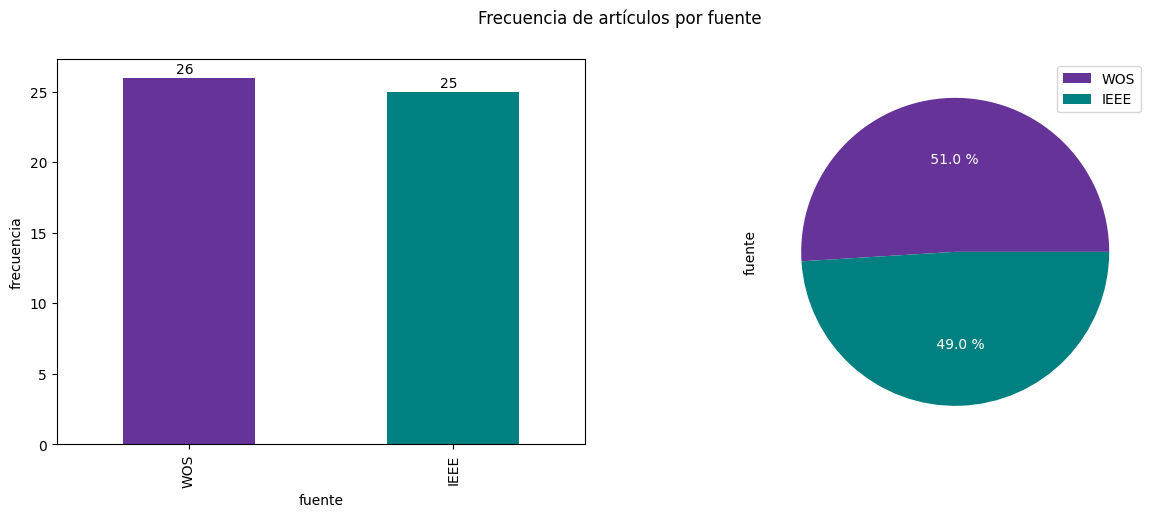

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
fig.suptitle('Frecuencia de artículos por fuente')

df['source.database'].value_counts().plot(ax = ax1, kind = 'bar', xlabel = 'fuente', ylabel = 'frecuencia', color = ['rebeccapurple', 'teal'])
df['source.database'].value_counts().plot(ax = ax2, kind = 'pie', ylabel = 'fuente', legend = True, autopct ='% 1.1f %%', colors = ['rebeccapurple', 'teal'], textprops={'color':"w"})

for p in ax1.patches:
    ax1.annotate(
        str(p.get_height()), xy=(p.get_x() + 0.2, p.get_height() + 0.3), fontsize=10
    )


plt.show()

## Distribución de artículos por dominio

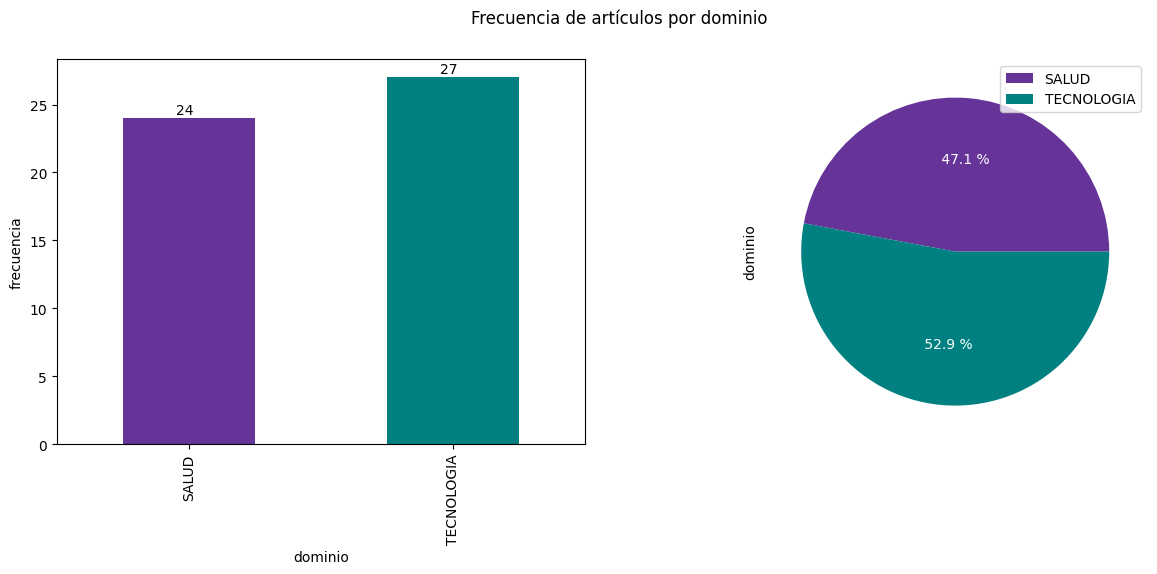

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
fig.suptitle('Frecuencia de artículos por dominio')

df['domain'].value_counts().sort_values().plot(ax = ax1, kind = 'bar', xlabel = 'dominio', ylabel = 'frecuencia', color = ['rebeccapurple', 'teal'])
df['domain'].value_counts().sort_values().plot(ax = ax2, kind = 'pie', ylabel = 'dominio', legend = True, autopct ='% 1.1f %%', colors = ['rebeccapurple', 'teal'], textprops={'color':"w"})

for p in ax1.patches:
    ax1.annotate(
        str(p.get_height()), xy=(p.get_x() + 0.2, p.get_height() + 0.3), fontsize=10
    )

plt.show()

# Información de los datos por autor

In [ ]:
df_authors = pd.read_csv('/content/drive/MyDrive/TFM/notebooks/entrega/autores_lev_plain.csv')
df_authors

,Unnamed: 0,id,author,domain,source
0,0,25.0,J. Yu,TECNOLOGIA,IEEE
1,1,24.0,Zhuang Ye,TECNOLOGIA,IEEE
2,2,25.0,Jianbo Yu,TECNOLOGIA,IEEE
3,3,24.0,Z. Ye,TECNOLOGIA,IEEE
4,4,20.0,Yuan'An Liu,TECNOLOGIA,IEEE
...,...,...,...,...,...
188,188,30.0,"Vasalauskaite, A",TECNOLOGIA,WOS
189,189,29.0,"Sleep, N",TECNOLOGIA,WOS
190,190,27.0,"Margetts, S",TECNOLOGIA,WOS
191,191,32.0,"Burckett-St Laurent, D",TECNOLOGIA,WOS


## Distribución de autores por fuente

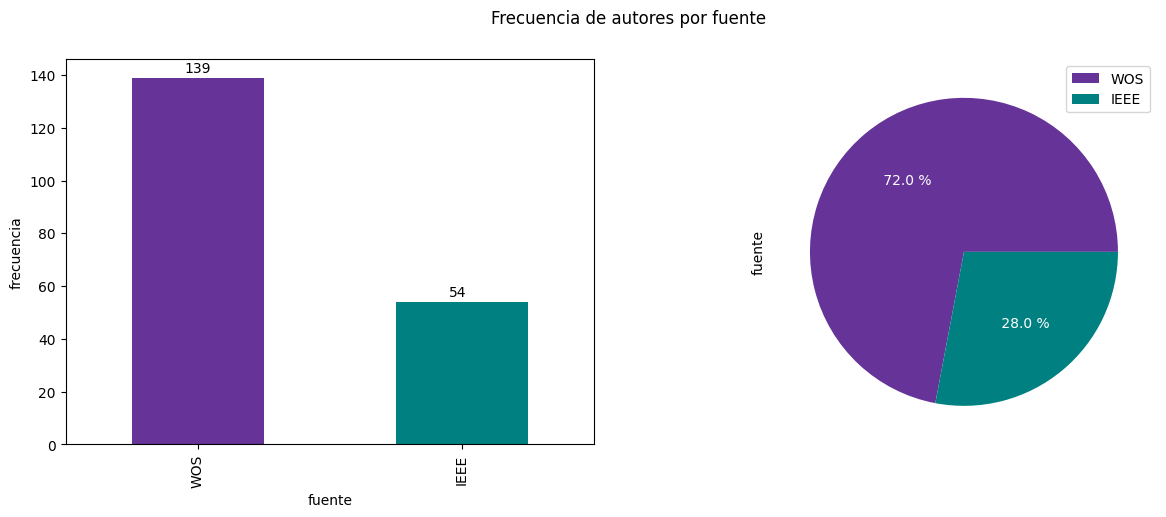

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
fig.suptitle('Frecuencia de autores por fuente')

df_authors['source'].value_counts().plot(ax = ax1, kind = 'bar', xlabel = 'fuente', ylabel = 'frecuencia', color = ['rebeccapurple', 'teal'])
df_authors['source'].value_counts().plot(ax = ax2, kind = 'pie', ylabel = 'fuente', legend = True, autopct ='% 1.1f %%', colors = ['rebeccapurple', 'teal'], textprops={'color':"w"})

for p in ax1.patches:
    ax1.annotate(
        str(p.get_height()), xy=(p.get_x() + 0.2, p.get_height() + 2), fontsize=10
    )

plt.show()

##Distribución de autores por dominio

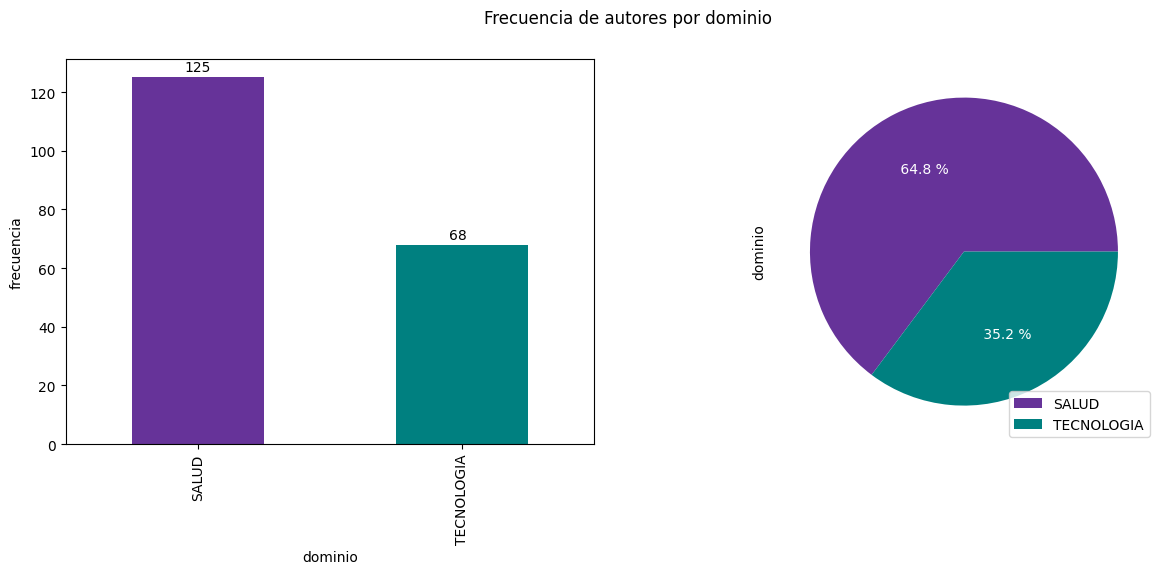

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
fig.suptitle('Frecuencia de autores por dominio')

df_authors['domain'].value_counts().plot(ax = ax1, kind = 'bar', xlabel = 'dominio', ylabel = 'frecuencia', color = ['rebeccapurple', 'teal'])
df_authors['domain'].value_counts().plot(ax = ax2, kind = 'pie', ylabel = 'dominio', legend = True, autopct ='% 1.1f %%', colors = ['rebeccapurple', 'teal'], textprops={'color':"w"})

for p in ax1.patches:
    ax1.annotate(
        str(p.get_height()), xy=(p.get_x() + 0.2, p.get_height() + 2), fontsize=10
    )
plt.show()

## Pares por etiqueta (mismo autor/diferente autor)


In [ ]:
df_characteristics = pd.read_csv('/content/drive/MyDrive/TFM/notebooks/entrega/autores_lev_clean.csv')
df_characteristics

,Unnamed: 0,author,candidate,label
0,0,J. Yu,J. Yu,1
1,1,J. Yu,Zhuang Ye,0
2,2,J. Yu,Jianbo Yu,1
3,3,J. Yu,Z. Ye,0
4,4,J. Yu,Yuan'An Liu,0
...,...,...,...,...
76230,76230,"Bowness, James Simeon","Lobo, Clara",0
76231,76231,"Bowness, James Simeon","Keane, Pearse A",0
76232,76232,"Bowness, James Simeon","Hernandez, Nadia",0
76233,76233,"Bowness, James Simeon","Burckett-St Laurent, D",0


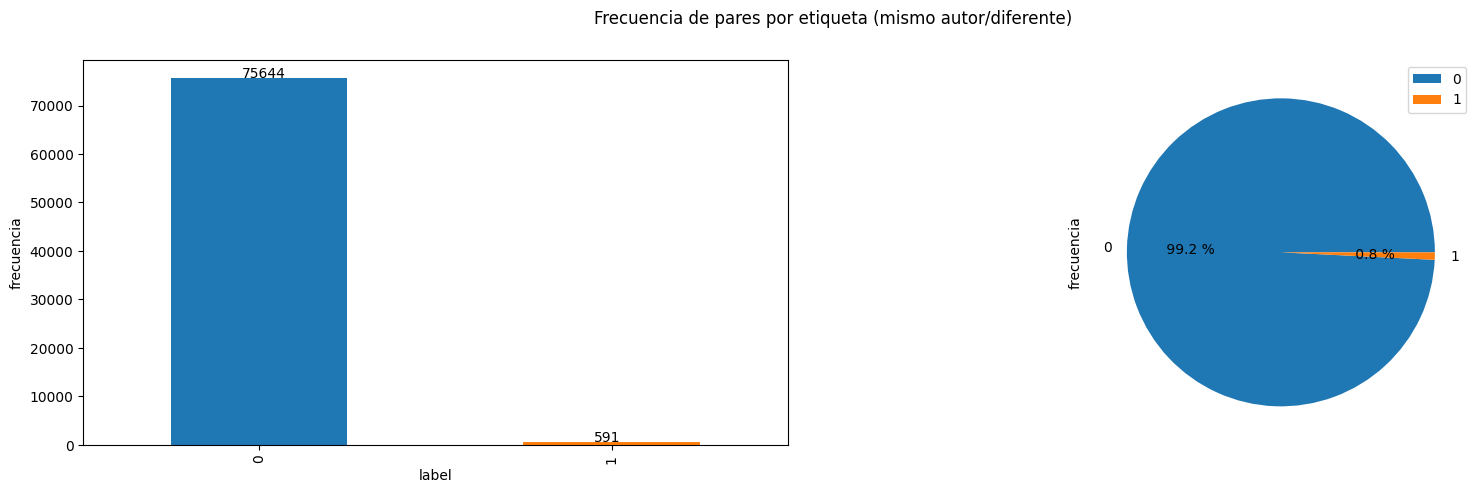

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 5))
fig.suptitle('Frecuencia de pares por etiqueta (mismo autor/diferente)')

df_characteristics['label'].value_counts().plot(ax = ax1, kind = 'bar', xlabel = 'label', ylabel = 'frecuencia', color = ['tab:blue', 'tab:orange'])
df_characteristics['label'].value_counts().plot(ax = ax2, kind = 'pie', xlabel = 'label', ylabel = 'frecuencia', legend = True, autopct ='% 1.1f %%')

for p in ax1.patches:
    ax1.annotate(
        str(p.get_height()), xy=(p.get_x() + 0.2, p.get_height() + 2), fontsize=10
    )
plt.show()

## Autores con enlace

In [ ]:
import pandas as pd
df_characteristics = pd.read_excel('/content/drive/MyDrive/TFM/notebooks/entrega/characteristics_modificados_concatenados.xlsx')
df_characteristics

,id_temp,id,characteristics,domain,source,name
0,286.0,1.0,C. I. Lang Modeling and Optimizing the Impact ...,TECNOLOGIA,IEEE,C. I. Lang
1,291.0,1.0,C. I. Lang One Class Process Anomaly Detection...,TECNOLOGIA,IEEE,C. I. Lang
2,302.0,1.0,C. I. Lang Intelligent Optimization of Dosing ...,TECNOLOGIA,IEEE,C. I. Lang
3,290.0,2.0,D. S. Boning Modeling and Optimizing the Impac...,TECNOLOGIA,IEEE,D. S. Boning
4,301.0,2.0,D. S. Boning One Class Process Anomaly Detecti...,TECNOLOGIA,IEEE,D. S. Boning
...,...,...,...,...,...,...
391,379.0,NaN,S. Li Joint Task Offloading and Resource Alloc...,TECNOLOGIA,IEEE,S. Li
392,380.0,NaN,J. Liu Joint Task Offloading and Resource Allo...,TECNOLOGIA,IEEE,J. Liu
393,385.0,NaN,"Z. Chen DNN Deployment, Task Offloading, and R...",TECNOLOGIA,IEEE,Z. Chen
394,386.0,NaN,"Z. Hao DNN Deployment, Task Offloading, and Re...",TECNOLOGIA,IEEE,Z. Hao


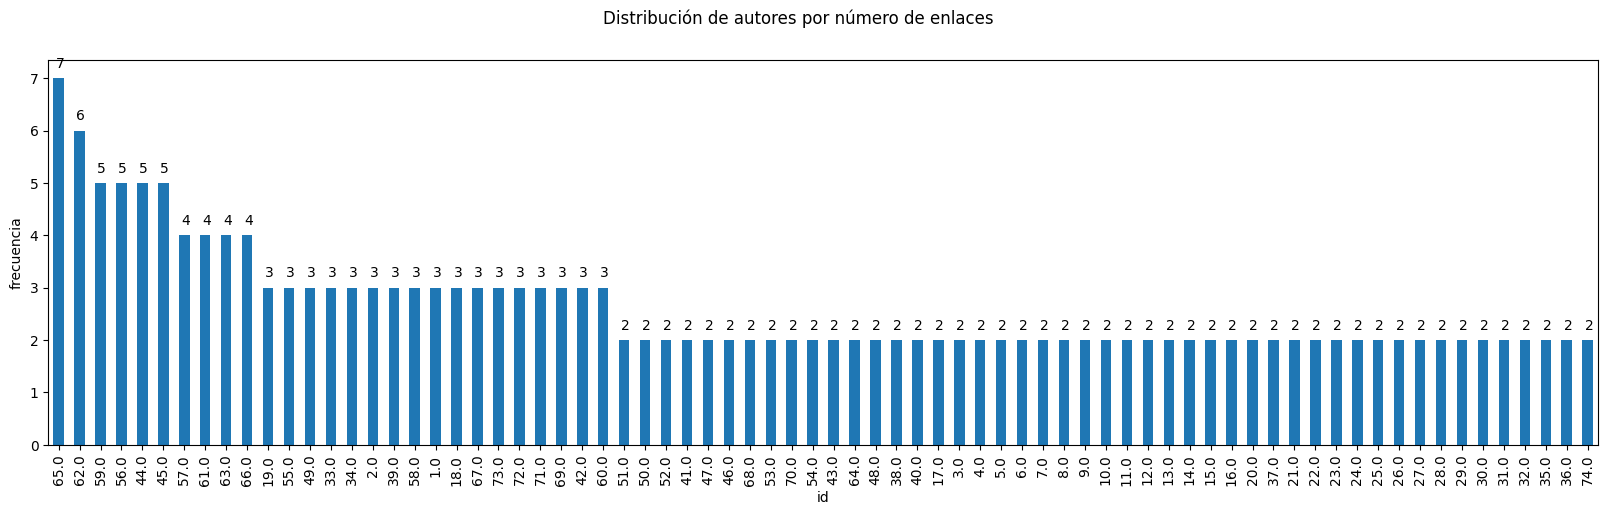

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(1, 1, figsize = (20, 5))
fig.suptitle('Distribución de autores por número de enlaces')

df_characteristics['id'].value_counts().plot(ax = ax1, kind = 'bar', xlabel = 'id', ylabel = 'frecuencia')
for p in ax1.patches:
    ax1.annotate(
        str(p.get_height()), xy=(p.get_x() + 0.1, p.get_height() + 0.2), fontsize=10
    )

Con este gráfico de barras podemos observar, por cada ID - que se muestra en el eje X -, la cantidad de veces que aparece un mismo autor - que se muestra en el eje Y. No se han tenido en cuenta los autores que no aparecen varias veces, es decir, que no deben ser enlazados con nadie.

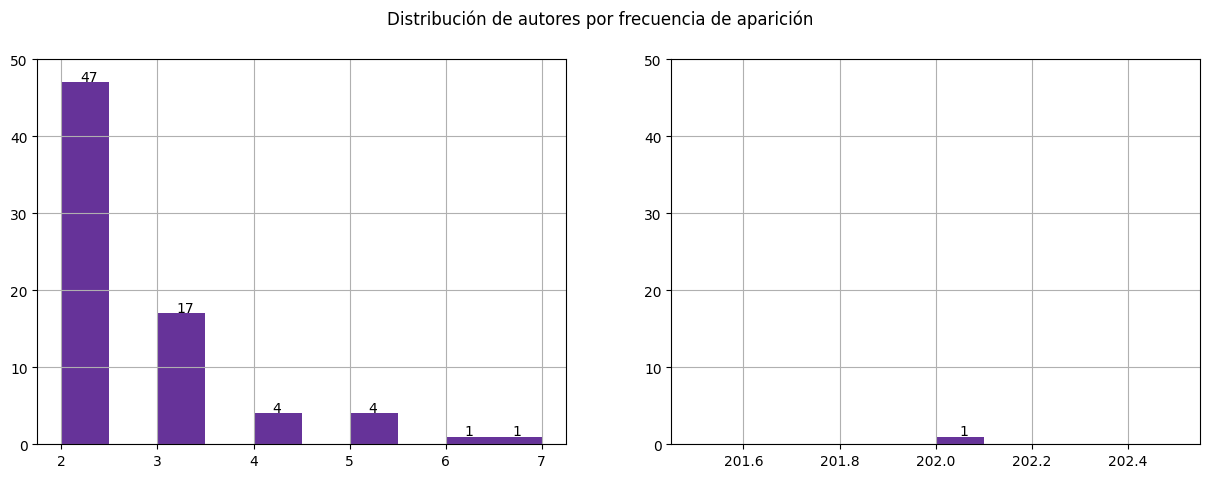

In [ ]:
df_no_nan = df_characteristics.replace(np.nan, -1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
fig.suptitle('Distribución de autores por frecuencia de aparición')

df_characteristics.groupby('id').count()['characteristics'].hist(ax = ax1, color= 'rebeccapurple')
ax1.set_ylim([0, 50])
df_no_nan.loc[df_no_nan['id'] == -1].groupby('id').count()['characteristics'].hist(ax = ax2, color = 'rebeccapurple')
ax2.set_ylim([0, 50])

for p in ax1.patches :
  if int(p.get_height()) > 0 :
    ax1.annotate(
        str(int(p.get_height())), xy=(p.get_x() + 0.2, p.get_height() + 0.2), fontsize=10
    )

for p in ax2.patches :
  if int(p.get_height()) > 0 :
    ax2.annotate(
        str(int(p.get_height())), xy=(p.get_x() + 0.05, p.get_height() + 0.2), fontsize=10
    )

plt.show()

Este par de histogramas ha sido separado por razones estéticas.
En ellos se puede observar la cantidad de autores - en el eje Y - que se repiten varias veces, especificado en el eje X.
En la segunda gráfica vemos que hay un grupo de 200 autores, a los que se les ha asignado el ID -1, lo que significa que no están enlazados en el conjunto de datos.


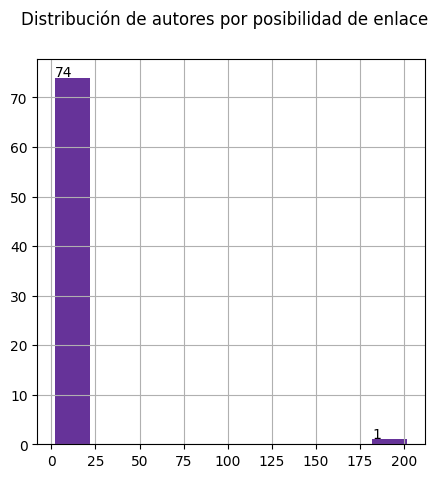

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
fig.suptitle('Distribución de autores por posibilidad de enlace')
df_no_nan.groupby('id').count()['characteristics'].hist(ax = ax, bins = 10, color = 'rebeccapurple')

for p in ax.patches :
  if int(p.get_height()) > 0 :
    ax.annotate(
        str(int(p.get_height())), xy=(p.get_x() + 0.05, p.get_height() + 0.2), fontsize=10
    )

En esta última gráfica, observamos que tenemos 74 autores que se repiten, es decir, que se espera que sean enlazados, y 202 que no.

# Información sobre los datos por conjuntos train y test


## train


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/TFM/notebooks/entrega/train_limpio.csv', index_col = 0)
df_train

,author,author_name,candidate,candidate_name,label
3892,"Weingarten , JA Oxidized HDL , Adipokines , En...","Weingarten, JA","Estevez-Fraga , C Biological clinical characte...","Estevez-Fraga, C",0
64711,Cristopher I. Lang One Class Process Anomaly D...,Cristopher I. Lang,"Johnson , Eileanoir B . Multi-Study Model-Base...","Johnson, Eileanoir B.",0
22531,S. Guo UIR-Net : Object Detection Infrared Ima...,S. Guo,"Guo , Process Monitoring Fault Prediction Mult...","Guo, S",1
28419,"Thompson , Ellen Detecting early onset anthrac...","Thompson, Ellen","E. Thompson Oxidized HDL , Adipokines , Endoth...",E. Thompson,1
41685,H. Zetterberg Mutant huntingtin neurofilament ...,H. Zetterberg,"Zetterberg , H Brain-derived neurotrophic fact...","Zetterberg, H",1
...,...,...,...,...,...
11097,"Caron , NS Mutant Huntingtin Cleared Brain via...","Caron, NS","Caron , Nicholas Cerebrospinal fluid biomarker...","Caron, Nicholas S",1
19579,"Langley , C Biological clinical characteristic...","Langley, C","Sodhi , K Biomarker panel early screening tras...","Sodhi, K",0
24980,E. Wilson Intelligent Optimization Dosing Unif...,E. Wilson,W. Guo Process Monitoring Fault Prediction Mul...,W. Guo,0
70520,"Parker , C Biological clinical characteristics...","Parker, C",Z. Ye Deep Negative Correlation Multisource Do...,Z. Ye,0


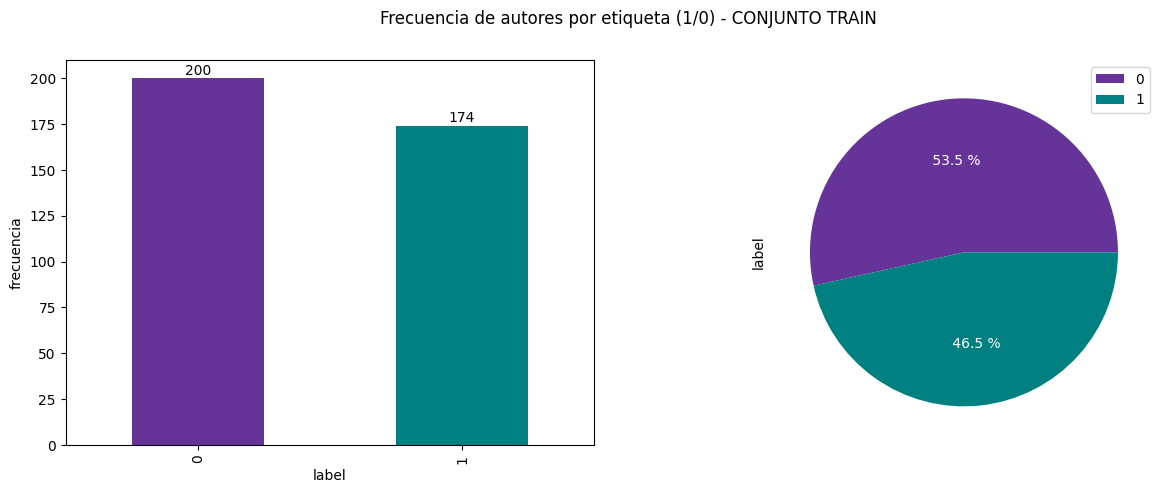

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
fig.suptitle('Frecuencia de autores por etiqueta (1/0) - CONJUNTO TRAIN')

df_train['label'].value_counts().plot(ax = ax1, kind = 'bar', xlabel = 'label', ylabel = 'frecuencia', color = ['rebeccapurple', 'teal'])
df_train['label'].value_counts().plot(ax = ax2, kind = 'pie', ylabel = 'label', legend = True, autopct ='% 1.1f %%', colors = ['rebeccapurple', 'teal'], textprops={'color':"w"})

for p in ax1.patches:
    ax1.annotate(
        str(p.get_height()), xy=(p.get_x() + 0.2, p.get_height() + 2), fontsize=10
    )
plt.show()

In [ ]:
print('Total de autores en el conjunto de train: ' + str(len(df_train)))

Total de autores en el conjunto de train: 374


## test

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/TFM/notebooks/entrega/test_limpio.csv', index_col = 0)
df_test

,author,author_name,candidate,candidate_name,label
6676,"Wild , Edward J Mutant huntingtin neurofilamen...","Wild, Edward J","Wild , E J Longitudinal evaluation proton magn...","Wild, E J",1
8383,"Byrne , LM Longitudinal evaluation proton magn...","Byrne, LM","Guo , W Deep-Learning-Based Surrogate Model Th...","Guo, W",0
12080,"Gordon , B Cerebrospinal fluid mutant huntingt...","Gordon, B","Wu , H Diagnostic value alpha-fetoprotein , Le...","Wu, H",0
11992,"Banos , Raul Mutant Huntingtin Cleared Brain v...","Banos, Raul","Shapiro , JI Oxidized HDL , Adipokines , Endot...","Shapiro, JI",0
241,"Z. Chen DNN Deployment , Task Offloading , Res...",Z. Chen,H. Chaoui Developing Online Data-Driven State ...,H. Chaoui,0
...,...,...,...,...,...
2680,J. Cui Partial Transfer Learning Multidiscrimi...,J. Cui,"Harrington , M. G. Accumulation Cerebrospinal ...","Harrington, M. G.",0
3257,R. Jin Bi-LSTM-Based Two-Stream Network Machin...,R. Jin,"Lowe , AJ Longitudinal evaluation proton magne...","Lowe, AJ",0
5955,"Wild , EJ Biological clinical characteristics ...","Wild, EJ","Wild , Edward J Mutant huntingtin neurofilamen...","Wild, Edward J",1
8315,"Zetterberg , Henrik Longitudinal evaluation pr...","Zetterberg, Henrik","Parker , C Biological clinical characteristics...","Parker, C",0


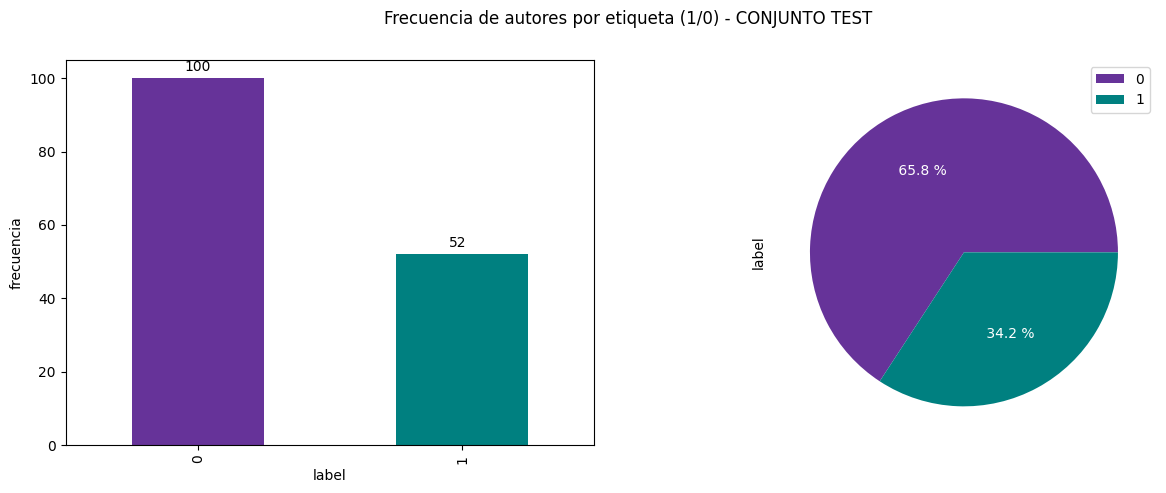

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
fig.suptitle('Frecuencia de autores por etiqueta (1/0) - CONJUNTO TEST')

df_test['label'].value_counts().plot(ax = ax1, kind = 'bar', xlabel = 'label', ylabel = 'frecuencia', color = ['rebeccapurple', 'teal'])
df_test['label'].value_counts().plot(ax = ax2, kind = 'pie', ylabel = 'label', legend = True, autopct ='% 1.1f %%', colors = ['rebeccapurple', 'teal'], textprops={'color':"w"})

for p in ax1.patches:
    ax1.annotate(
        str(p.get_height()), xy=(p.get_x() + 0.2, p.get_height() + 2), fontsize=10
    )
plt.show()

In [ ]:
print('Total de autores en el conjunto de test: ' + str(len(df_test)))

Total de autores en el conjunto de test: 152
